<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/bcs-iitk/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/bcs-iitk/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [ ]:
# Copyright (c) 2020 Brain and Cognitive Society, IIT Kanpur [ BCS @IITK ]
# Copyright under MIT License, must reference https://github.com/bcs-iitk/BCS_Workshop_Apr_20 if used anywhere else.
# Author: Shashi Kant (http://shashikg.github.io/)



> Note: Do not forget to click on **Copy to Drive** in Google Colab to save a copy of this assignment.

![copy2drive](https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/copy2drive.png)



# Assignment 1: Machine Learning


## Question 1: Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# I'm doing this assignment locally, so these lines have been commented out since the files are already here :)

# !wget --no-check-certificate https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/X.npy -O X.npy
# !wget --no-check-certificate https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/y.npy -O y.npy

In [2]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------

  X = np.load(path_X)
  y = np.load(path_y)

  # -------------------------------

  return X, y

In [9]:
X, y = load_data_LR()
print(X.shape, y.shape)

(50, 1) (50, 1)


In [10]:
def get_linear_model(X, y):
  # This should return a proper linear model without bias of type y = XW

  # Write your code here ----------
  
  # N = y.shape[0] # number of train samples
  D = X.shape[1] # number of train features
  out_shape = y.shape[1] # sample dimension

  # -------------------------------
  
  W = np.random.randn(D, out_shape) # fixed as per recent commits

  return W

In [26]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  
  diff = np.subtract(y, y_pred)
  error = np.matmul(diff.T, diff)
  error = error.item()

  # -------------------------------

  return error

In [27]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  
  # Simply using the normal formula: W = (X.T * X)^-1 * X.T * y

  W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

  # -------------------------------

  return W

In [28]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  
  # initialize weights with random normal distribution
  
  W = get_linear_model(X,y) 
  error_hist = []

  for epoch in range(epochs):
    y_pred = np.matmul(X, W)
    diff = y - y_pred
    grad = - np.matmul(X.T, diff)
    W = W - lr * grad
    mse_error = MSE(y, y_pred)
    print("Epoch: {}, MSE Error: {}".format(epoch, mse_error))
    error_hist.append(mse_error)
    
  # -------------------------------

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and print mean square error between actual y and predicted y. Use `y_pred = XW`

In [29]:
# Write your code here ----------

X,y = load_data_LR()

W = train_by_algebra(X, y)

y_pred = np.matmul(X, W)

mse_error = MSE(y, y_pred)

print(mse_error)

# -------------------------------

(50, 1)
274.5029910321911


##### Learn **W** using gradient descent method for following learning rates, `lr = [10, 1, 0.1, 0.01, 0.001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.

Epoch: 0, MSE Error: 39271.27466780805
Epoch: 1, MSE Error: 636962437489.627
Epoch: 2, MSE Error: 1.0403967533154898e+19
Epoch: 3, MSE Error: 1.6993551598456985e+26
Epoch: 4, MSE Error: 2.775679518502401e+33
Epoch: 5, MSE Error: 4.533717831023196e+40
Epoch: 6, MSE Error: 7.405248781180536e+47
Epoch: 7, MSE Error: 1.2095527678395396e+55
Epoch: 8, MSE Error: 1.975649895660978e+62
Epoch: 9, MSE Error: 3.2269716658967884e+69
LR: 10, Mean MSE Error: 3.22697186346179e+68


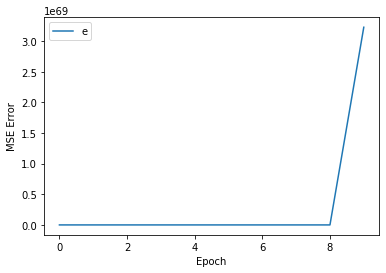


Epoch: 0, MSE Error: 37500.50214553749
Epoch: 1, MSE Error: 13486.682485575844
Epoch: 2, MSE Error: 4963.744138637853
Epoch: 3, MSE Error: 1938.7993737356696
Epoch: 4, MSE Error: 865.1918386070688
Epoch: 5, MSE Error: 484.14913235382437
Epoch: 6, MSE Error: 348.91019332066605
Epoch: 7, MSE Error: 300.91145110446234
Epoch: 8, MSE Error: 283.87583051465026
Epoch: 9, MSE Error: 277.829581061429
Epoch: 10, MSE Error: 275.6836579201
Epoch: 11, MSE Error: 274.92203103650564
Epoch: 12, MSE Error: 274.6517158986324
Epoch: 13, MSE Error: 274.55577617363394
Epoch: 14, MSE Error: 274.52172543232086
Epoch: 15, MSE Error: 274.50964020918724
Epoch: 16, MSE Error: 274.50535094520774
Epoch: 17, MSE Error: 274.5038286079467
Epoch: 18, MSE Error: 274.5032883029555
Epoch: 19, MSE Error: 274.50309653895476
Epoch: 20, MSE Error: 274.5030284784472
Epoch: 21, MSE Error: 274.50300432254386
Epoch: 22, MSE Error: 274.5029957491773
Epoch: 23, MSE Error: 274.5029927063347
Epoch: 24, MSE Error: 274.5029916263748


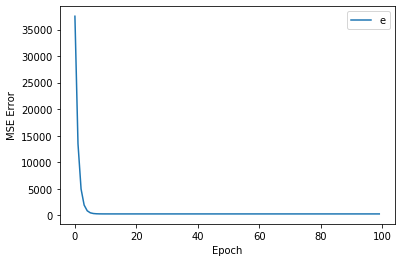

Epoch: 0, MSE Error: 44717.59547942719
Epoch: 1, MSE Error: 7226916543.280431
Epoch: 2, MSE Error: 1175172919606575.5
Epoch: 3, MSE Error: 1.9109552949194798e+20
Epoch: 4, MSE Error: 3.107415154192102e+25
Epoch: 5, MSE Error: 5.0529852614420223e+30
Epoch: 6, MSE Error: 8.216687756672973e+35
Epoch: 7, MSE Error: 1.3361202179994556e+41
Epoch: 8, MSE Error: 2.1726726021651405e+46
Epoch: 9, MSE Error: 3.532995139664124e+51
LR: 1, Mean MSE Error: 3.5330168665237587e+50


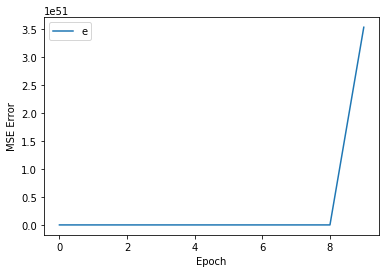


Epoch: 0, MSE Error: 47602.04843303834
Epoch: 1, MSE Error: 17071.903722189716
Epoch: 2, MSE Error: 6236.203913570702
Epoch: 3, MSE Error: 2390.4183316640215
Epoch: 4, MSE Error: 1025.4795641432672
Epoch: 5, MSE Error: 541.0381413436639
Epoch: 6, MSE Error: 369.1011301688852
Epoch: 7, MSE Error: 308.0775792906919
Epoch: 8, MSE Error: 286.4192188461334
Epoch: 9, MSE Error: 278.732275520224
Epoch: 10, MSE Error: 276.00404048844507
Epoch: 11, MSE Error: 275.03574059692147
Epoch: 12, MSE Error: 274.692073475503
Epoch: 13, MSE Error: 274.57009980662417
Epoch: 14, MSE Error: 274.5268091483896
Epoch: 15, MSE Error: 274.51144451184456
Epoch: 16, MSE Error: 274.50599132481113
Epoch: 17, MSE Error: 274.5040558902348
Epoch: 18, MSE Error: 274.5033689695447
Epoch: 19, MSE Error: 274.5031251689843
Epoch: 20, MSE Error: 274.50303863976194
Epoch: 21, MSE Error: 274.50300792897787
Epoch: 22, MSE Error: 274.5029970291659
Epoch: 23, MSE Error: 274.5029931606258
Epoch: 24, MSE Error: 274.50299178761105


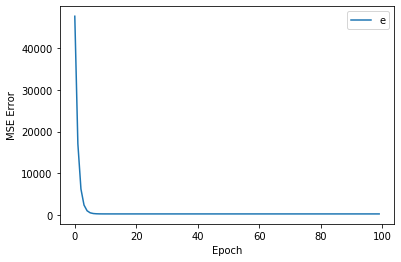

Epoch: 0, MSE Error: 35154.407003876826
Epoch: 1, MSE Error: 54215177.50721585
Epoch: 2, MSE Error: 84267884345.37413
Epoch: 3, MSE Error: 130980152915579.23
Epoch: 4, MSE Error: 2.0358646294344154e+17
Epoch: 5, MSE Error: 3.164406741884185e+20
Epoch: 6, MSE Error: 4.91853430886706e+23
Epoch: 7, MSE Error: 7.645028506385285e+26
Epoch: 8, MSE Error: 1.1882901936472664e+30
Epoch: 9, MSE Error: 1.8469958393731268e+33
LR: 0.1, Mean MSE Error: 1.848184894561795e+32


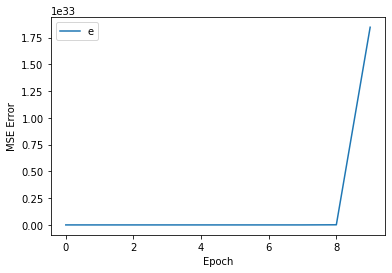


Epoch: 0, MSE Error: 40392.36920612643
Epoch: 1, MSE Error: 14513.058339727642
Epoch: 2, MSE Error: 5328.023468190191
Epoch: 3, MSE Error: 2068.0886875891842
Epoch: 4, MSE Error: 911.0789513819108
Epoch: 5, MSE Error: 500.435297513591
Epoch: 6, MSE Error: 354.69044750472585
Epoch: 7, MSE Error: 302.9629677202263
Epoch: 8, MSE Error: 284.60395081710374
Epoch: 9, MSE Error: 278.0880041084427
Epoch: 10, MSE Error: 275.7753769272515
Epoch: 11, MSE Error: 274.9545837688182
Epoch: 12, MSE Error: 274.66326945131385
Epoch: 13, MSE Error: 274.55987673816674
Epoch: 14, MSE Error: 274.5231807967399
Epoch: 15, MSE Error: 274.51015674430715
Epoch: 16, MSE Error: 274.5055342728518
Epoch: 17, MSE Error: 274.50389367423884
Epoch: 18, MSE Error: 274.5033113961578
Epoch: 19, MSE Error: 274.5031047351494
Epoch: 20, MSE Error: 274.5030313874248
Epoch: 21, MSE Error: 274.50300535499247
Epoch: 22, MSE Error: 274.5029961156119
Epoch: 23, MSE Error: 274.502992836389
Epoch: 24, MSE Error: 274.50299167253354
E

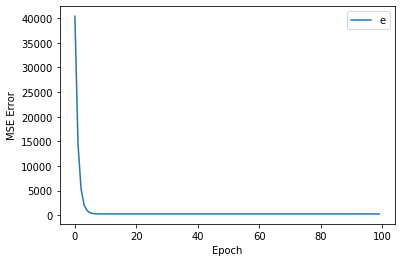

Epoch: 0, MSE Error: 37420.28331310603
Epoch: 1, MSE Error: 344125.79443753255
Epoch: 2, MSE Error: 3183239.28672357
Epoch: 3, MSE Error: 29464362.806576293
Epoch: 4, MSE Error: 272743631.26217127
Epoch: 5, MSE Error: 2524732683.9973526
Epoch: 6, MSE Error: 23370959022.28796
Epoch: 7, MSE Error: 216340437279.4911
Epoch: 8, MSE Error: 2002621509670.01
Epoch: 9, MSE Error: 18537879304831.285
LR: 0.01, Mean MSE Error: 2078304271626.6504


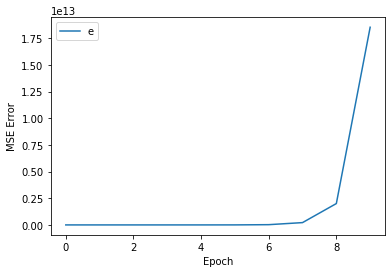


Epoch: 0, MSE Error: 35984.775112897965
Epoch: 1, MSE Error: 12948.723583872552
Epoch: 2, MSE Error: 4772.81280754069
Epoch: 3, MSE Error: 1871.034395632119
Epoch: 4, MSE Error: 841.1408238732001
Epoch: 5, MSE Error: 475.61299280332145
Epoch: 6, MSE Error: 345.88056321017194
Epoch: 7, MSE Error: 299.836180655554
Epoch: 8, MSE Error: 283.49419761026
Epoch: 9, MSE Error: 277.6941326504165
Epoch: 10, MSE Error: 275.6355848324948
Epoch: 11, MSE Error: 274.9049690293944
Epoch: 12, MSE Error: 274.6456602841261
Epoch: 13, MSE Error: 274.55362692666625
Epoch: 14, MSE Error: 274.5209626257511
Epoch: 15, MSE Error: 274.50936947535746
Epoch: 16, MSE Error: 274.50525485688155
Epoch: 17, MSE Error: 274.50379450446405
Epoch: 18, MSE Error: 274.5032761990134
Epoch: 19, MSE Error: 274.5030922430472
Epoch: 20, MSE Error: 274.503026953752
Epoch: 21, MSE Error: 274.50300378140196
Epoch: 22, MSE Error: 274.5029955571162
Epoch: 23, MSE Error: 274.50299263816873
Epoch: 24, MSE Error: 274.5029916021816
Epoc

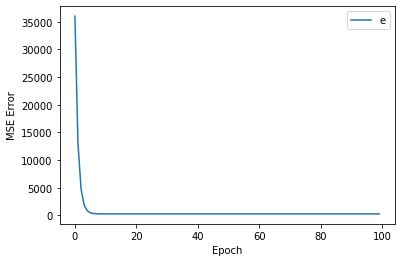

Epoch: 0, MSE Error: 35906.79545599274
Epoch: 1, MSE Error: 12921.047195129333
Epoch: 2, MSE Error: 4762.989957270955
Epoch: 3, MSE Error: 1867.5480886461555
Epoch: 4, MSE Error: 839.9034705524625
Epoch: 5, MSE Error: 475.1738337600972
Epoch: 6, MSE Error: 345.7246977334215
Epoch: 7, MSE Error: 299.78086118253503
Epoch: 8, MSE Error: 283.47456373007776
Epoch: 9, MSE Error: 277.68716423170287
LR: 0.001, Mean MSE Error: 5798.012528822949


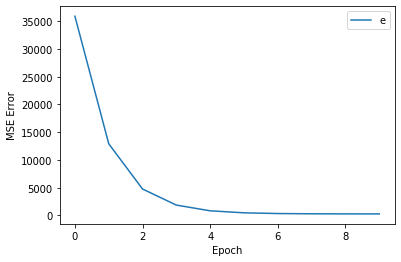


Epoch: 0, MSE Error: 34528.4623567612
Epoch: 1, MSE Error: 12431.851882070461
Epoch: 2, MSE Error: 4589.3657045760165
Epoch: 3, MSE Error: 1805.9257052766577
Epoch: 4, MSE Error: 818.0325736403283
Epoch: 5, MSE Error: 467.4114574029044
Epoch: 6, MSE Error: 342.9696901563312
Epoch: 7, MSE Error: 298.8030592311014
Epoch: 8, MSE Error: 283.1275241559661
Epoch: 9, MSE Error: 277.5639936184485
Epoch: 10, MSE Error: 275.5893961394129
Epoch: 11, MSE Error: 274.8885758279364
Epoch: 12, MSE Error: 274.6398420408265
Epoch: 13, MSE Error: 274.5515619270271
Epoch: 14, MSE Error: 274.52022972008024
Epoch: 15, MSE Error: 274.50910935389675
Epoch: 16, MSE Error: 274.5051625350767
Epoch: 17, MSE Error: 274.5037617377879
Epoch: 18, MSE Error: 274.50326456952837
Epoch: 19, MSE Error: 274.5030881155328
Epoch: 20, MSE Error: 274.50302548882263
Epoch: 21, MSE Error: 274.50300326147186
Epoch: 22, MSE Error: 274.5029953725838
Epoch: 23, MSE Error: 274.50299257267494
Epoch: 24, MSE Error: 274.50299157893653


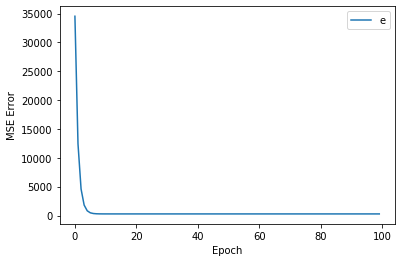

In [32]:
# Write your code here ----------
  
# Data already loaded in previous cell, ain't loading it again

lrs = [10, 1, 0.1, 0.01, 0.001]
epochs = 10

for lr in lrs:
    W, history = train_by_GD(X, y, epochs, lr)
    
    mean_error = sum(history)/epochs
    
    print("LR: {}, Mean MSE Error: {}".format(lr, mean_error))

    plt.figure(0)
    plt.plot(history)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Error")
    plt.legend('error')
    plt.show()

    print()

# lr = 0.001 and epochs = 100 converges to the minima.

    # W, history = train_by_GD(X, y, 100, 0.001)
    # mean_error = sum(history)/epochs
    # print("LR: {}, Mean MSE Error: {}".format(lr, mean_error))
    # plt.figure(0)
    # plt.plot(history)
    # plt.xlabel("Epoch")
    # plt.ylabel("MSE Error")
    # plt.legend('error')
    # plt.show()

# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# dataset import
from tensorflow.keras.datasets import cifar10

# imports for layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D

In [2]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [3]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------

  (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255

  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [4]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
    
  model = Sequential()
  model.add(Dense(7200, activation='relu'))
  model.add(Dense(2304, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [5]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  
  model = Sequential()
  model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
  model.add(MaxPool2D()) # default pool size (2,2)
  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(MaxPool2D()) 
  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # -------------------------------

  return model

SyntaxError: invalid syntax (<ipython-input-5-334d65a28006>, line 11)

### Compile and train the fully connected neural network model using the above functions.

In [6]:
# Write your code here ----------

x_train, y_train, x_test, y_test = load_data_cifar10_norm()
model = build_fc_model()
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

TypeError: Value passed to parameter 'a' has DataType uint8 not in list of allowed values: bfloat16, float16, float32, float64, int32, int64, complex64, complex128

### Compile and train the CNN model using the above functions.

In [ ]:
# Write your code here ----------

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [ ]:
print("Replace this with your observation")

## Question 3: Image Classification in Tensorflow using Transfer Learning
In this we will again try to learn a classification model for **cifar10** but by using the concept of transfer learning. 

### Brief description on Transfer Learning:

The idea behind transfer learning for image classification is that when you train a model on a very large image dataset like ImageNet, then this model can effectivly serve as generic model of visual world. If you remember, a closer look at every CNN model gives you an idea that every CNN model used to have some sets of convolutional layers followed by a dense layer and finally at last a classification (output) layer. So, here the convolutional layer somewhat act as feature mapping function which maps the input image to an different dimensional space. And finally at the end you apply dense layer to classify the images based on those extracted features. <br>

**Inshort this what you do in a CNN model:**
![](https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/cnn_model.png)

So what we will do in transfer learning is that we will use some already pre-trained model which are trained on ImageNet dataset. Will only use its learned convolutional layers as a feature mapping function. And finally will learn a fully connected neural network on those features to classify the images.


### Attributes of Transfer Learning model to be build

*   Pre-trained weights of VGG16 will be used as feature extracter
*   After this flatten the output and use dense layer of **64 neurons**



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------

  # -------------------------------

  return preprocess_input(x_train), y_train, preprocess_input(x_test), y_test

In [ ]:
def build_tl_model(num_class=10):
  # should return the ccombined model using the VGG16 conv layers as conv layers
  # and for fully connected layer part use the above attributes.

  base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet') # this is the conv layers from VGG16
  base_model.trainable = False # this ensures that while training the dense layers these weights don't get changed

  model = tf.keras.models.Sequential([
    # Feature extractor 
    base_model,

    # Flatten and use the attribute given the question to build the dense part
    # Write your code here ----------

    # -------------------------------
  ])

  return model

### Compile and train the model using above functions, use adam optimiser with learning rate = 0.0001

In [ ]:
# Write your code here ----------

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

## Question 4: Reinforcement Learning
In this you have to implement and train an RL agent to find a path for a frozen lake problem. 

### Frozen Lake Problem Description:

> Imagine there is a frozen lake stretching from your home to your office; you have to walk on the frozen lake to reach your office. But oops! There are holes in the frozen lake so you have to be careful while walking on the frozen lake to avoid getting trapped in the holes. [[src](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788836524/3/ch03lvl1sec32/solving-the-frozen-lake-problem)]

![frozen-lake](https://static.packt-cdn.com/products/9781788836524/graphics/49f3e058-2f32-40e8-9992-b53d1f57d138.png)


Two task you have to do here:

*   Implement a frozen lake scenario given the inputs, number of holes (M) and size of the lake (N) (Assume the lake is square). Starting point will be (0, 0) and goal will be to reach at (N-1, N-1)
*   Implemenat Q-learning method to learn a path from start to goal.
*   Use the following reward scheme: 50 points on reaching the goal, -50 points on stepping on a hole.

#### Q-learning
Recall from the lecture video that `Q[state, action]` gives you an action state pair to get an optimal policy. Recall the Q-Loss from the lecture video i.e:
> $E = ||r + \gamma \cdot \max_{a'} Q(s', a') - Q(s, a)||^2$

Use gradient descent to minimise $E$ and work out a learning rule for $Q(s, a)$. 
> Take $\max_{a'} Q(s', a')$ and $r$ to be independent of $Q(s, a)$.


### Defining important functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
ActionMap = ['Up', 'Right', 'Down', 'Left']

In [ ]:
def get_board(N, M):
  # should return an N x N size frozen lake - board with M randomle placed holes.
  # use 'S' representation for starting point
  # use 'G' representation for goal point
  # use 'H' representation for holes
  # use 'F' for frozen lakes 
  # Refer the representation from the image shown above

  # Write your code here ----------

  # -------------------------------

  return board

In [ ]:
def get_reward(board, N, M):
  # should return an N x N size reward table for the generated frozen lake scenario
  # use 50 reward for 'G' point
  # use -50 reward for 'H' point
  # o for rest.

  # Write your code here ----------

  # -------------------------------

  return reward

In [ ]:
class FrozenLake:
  def __init__(self, N, M):
    # Recall python class, this function is called when you first initialise the class
    # Should intialise the board and reward table based on the reward scheme
    # Select M numbers of holes randomly

    self.board = get_board(N, M)
    self.init_board = copy.deepcopy(self.board) 
    self.reward = get_reward(self.board, N, M)
    self.state = (0, 0)
    self.finish = 0
    self.N = N


  def reset(self):
    # should reset the env with board to initial state
    # hint: set self.state at 0, 0 and use self.init_board to reset self.board

    # Write your code here ----------

    # -------------------------------
    self.finish = 0

    return self.state
  
  def step(self, action):
    # ===== Action Table =========
    #     0 -- UP
    #     1 -- RIGHT
    #     2 -- DOWN
    #     3 -- LEFT
    # perform the given action and get update the  self.state, get reward, and update the self.board according to new state

    # Write your code here ----------

    # -------------------------------
    
    # status to check if you reached your goal
    if self.state == (N-1, N-1):
        self.finish = 1
        
    return self.state, reward, self.finish
  
  def get_random_action(self):
    # ===== Action Table =========
    #     0 -- UP
    #     1 -- RIGHT
    #     2 -- DOWN
    #     3 -- LEFT
    # should return a possible random action out of the four
    # hint: note that when you are around the corner or sides of the board not all four action will be available for you

    # Write your code here ----------

    # -------------------------------

    return action    
      
  def display(self):
    print(self.board)

### Environment creation and learning

In [ ]:
def explore_exploit(env, Q, state, episode):
  # Recall from the video there are two way how you perform an action in Value Learning
  # They are called explore or exploit?
  # Notice that if you always select your new action based on maximum Q-value you will never get to see any new path right?
  # You have to explore the environment to know new paths
  # Write your code here to randomly select whether you want to explore or exploit
  # The probability of exploration should be exp(-episode*5e-4)
  # for exploration get some random action
  # for exploitation get action based on max Q value

  # Write your code here ----------

  # -------------------------------

  return action

In [ ]:
def init_env_and_learn(N=6, M=12, gamma=0.8, lr=0.8):
  # gamma: gamma param of total discounted reward
  # lr: learning rate for Q updates
  # N = grid size of frozen lake wil be N x N
  # M = Number of holes
  # returns env, Q-function, rewards

  env = FrozenLake(N, M)
  Q = np.zeros((N, N, 4))

  total_episodes = 3000 # i.e. the number of times your RL agent will run through the board.
  max_steps = N*N*3 # maximum number of steps to perform

  rewards = []
  for episode in range(total_episodes):
    state = env.reset()
    total_rewards = 0

    for step in range(max_steps):
      action = explore_exploit(env, Q, state, episode)

      # Write your code here ----------------------------------------------------------
      # Should perform the action get reward, new_state, finish status and update the Q value


      reward = '...' # replace these with your values
      finish = '...' # replace these with your values
      new_state = '...' # replace these with your values
      # -------------------------------------------------------------------------------

      total_rewards += reward
      state = new_state
      
      if finish == 1: 
          break

    rewards.append(total_rewards)

  return env, Q, rewards

In [ ]:
def travel_path(env, Q):
  # write a function to display a sequence of path performed using the learned Q-values
  # show initial and final frozen lake board 
  # to perform an action at a state simply take max of Q at that state

  # Write your code here ----------

  # -------------------------------

  return

### Use N = 6, M = 10 and learn the models for following sets of gamma and lr:

*   `(gamma, lr) = (0.8, 0.8)`
*   `(gamma, lr) = (0.95, 0.8)`
*   `(gamma, lr) = (0.6, 0.8)`
*   `(gamma, lr) = (0.8, 0.95)`
*   `(gamma, lr) = (0.8, 0.1)`

Plot rewards vs episode for each of them and compare.



In [ ]:
# Write your code here ----------

# -------------------------------

print("Replace this with your observation")

### Use N = 6, M = 10 and learn a models with (gamma, lr) = (0.8, 0.8)
After learning the model, display a path traveled from source to goal.

In [ ]:
# Write your code here ----------

# -------------------------------